In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/ML LAB CSV/Mall_Customers.csv')

In [4]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
X = df.iloc[:, 3:].values

Text(0, 0.5, 'Euclidean distance')

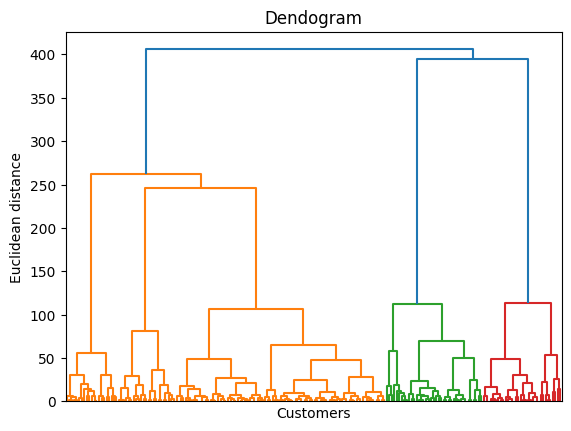

In [6]:
import scipy.cluster.hierarchy as sch
# Computes the hierarchical clustering using Ward's method (minimizing variance) and Euclidean distance metric.
dendogram = sch.dendrogram(sch.linkage(X, method='ward', metric='euclidean'), no_labels=True)
plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distance')

In [7]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, linkage='ward', affinity='euclidean') #ward is used so that clusters dont merge together
hc.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', n_clusters=5)

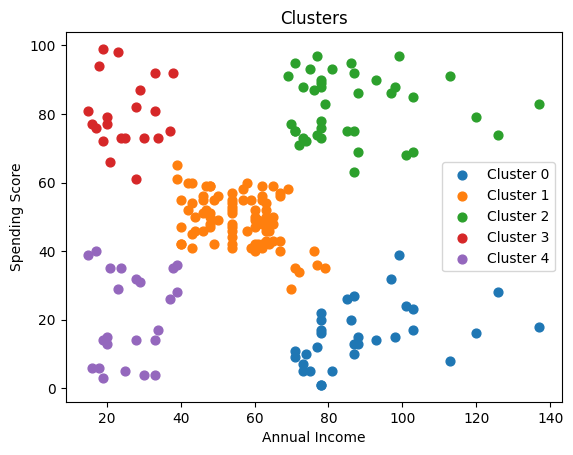

In [8]:
for i in range(hc.n_clusters_):
    plt.scatter(X[hc.labels_ == i, 0], X[hc.labels_ == i, 1], s=40, label='Cluster ' + str(i))

plt.title('Clusters')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()